<p style="text-align: center; font-weight: bold;">Practica 6</p>
<p style="text-align: center; font-weight: bold;">Laboratorio de bioseñales</p>
<p style="text-align: center; ">Orman Jesún Contreras</p>
<p style="text-align: center; ">Maria Camila Melan</p>

In [1]:
#Importo las bibliotecas:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from csv import reader as reader_csv;
import scipy.io as sio;
import os
import pandas as pd

**4.1. Creación de la señal**

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0≤𝑛≤1000, 𝐹0=0,01𝐻𝑧 y 𝐹𝑠=25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera

una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma: 𝑦𝑒(𝑛)=𝛼𝑥𝑒(𝑛−𝐷)+𝑤(𝑛)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.

- · Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza 𝜎2=0,01, establezca 𝛼=0,8 y un retraso 𝐷=15 muestras. Grafique ambas señales.



In [2]:
# Parámetros de la señal
Fs = 25  # Frecuencia de muestreo, Hz
F0 = 0.01  # Frecuencia fundamentel de la señal sinusoidal, Hz
alpha = 0.8  # atenuación
D = 15  # Retardo inducido
var = 0.01  # Varianza del ruido gaussiano

In [3]:
# Creación de la señal xe(n)
n = np.arange(0,1001,1/Fs) # Creamos una secuencia de índices de tiempo
xe =np.sin(2 * np.pi * F0 * (n+D / Fs)) #potencial con retardo

In [4]:
# Generamos una secuencia de ruido gaussiano con media 0 y varianza 0.01
wn = np.random.normal(0, np.sqrt(var), len(n))

In [5]:
# Creación de la señal ye(n)
ye = alpha * xe + wn

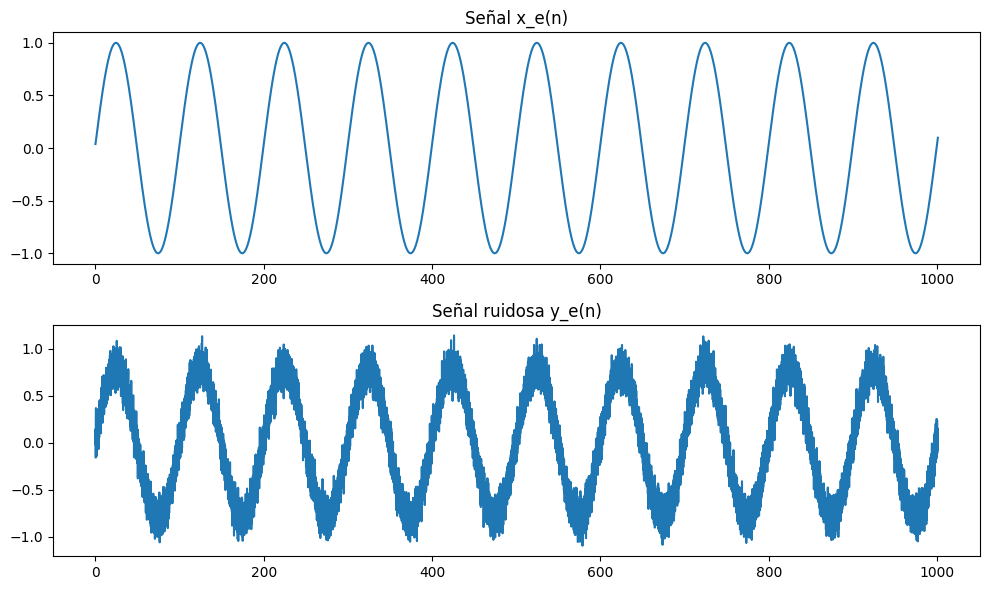

In [6]:
# Gráfica de ambas señales

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(n, xe)
plt.title('Señal x_e(n)')
plt.subplot(2, 1, 2)
plt.plot(n, ye)
plt.title('Señal ruidosa y_e(n)')
plt.tight_layout()
plt.show()

**4.2. Diseño de filtros**

- Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [7]:
# Parámetros del filtro FIR pasa bajas
fc_low = 1.25  # Frecuencia de corte en muestras
order = 30  # Orden del filtro
nyquist= Fs/2
wn = fc_low/nyquist #frecuencia de corte
 

In [8]:
# Diseño del filtro FIR pasa bajas
lowpass = signal.firwin(order+1,wn,pass_zero='lowpass',window='hamming')
y_f = signal.filtfilt(b=lowpass,a=1,x=ye) #aplico el filtro

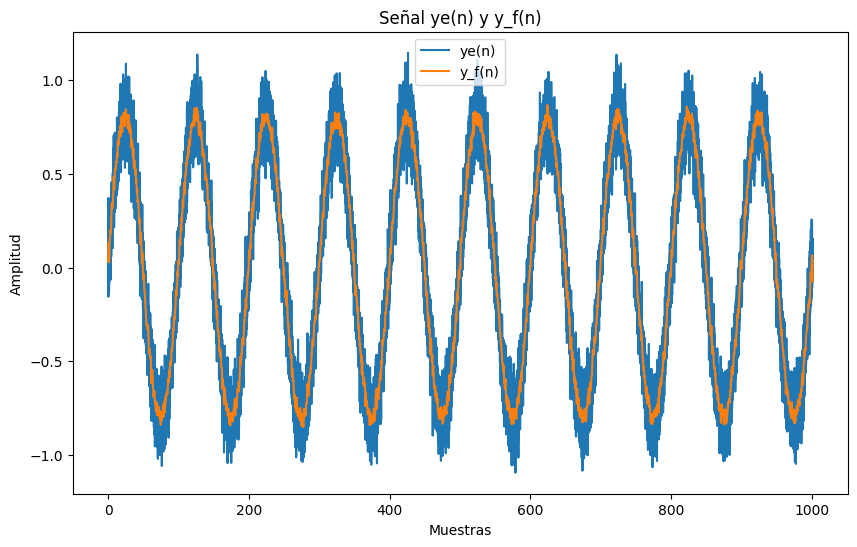

In [9]:
# Gráfica de la señal filtrada vs la señal sin filtrar
plt.figure(figsize=(10, 6))
plt.plot(n, ye, label='ye(n)')
plt.plot(n, y_f, label='y_f(n)')
plt.title('Señal ye(n) y y_f(n)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

- ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

_Filtro pasa alta_

Un filtro pasa altas permite el paso de frecuencias por encima de una frecuencia de corte específica mientras atenúa las frecuencias por debajo de esa frecuencia de corte. Para diseñar un filtro pasa altas con una frecuencia de corte adicional de 7.5 muestras/s, necesitamos definir una única frecuencia de corte.

In [10]:
# Parámetros del filtro FIR pasa altas
fc_high = 7.5  # Frecuencia de corte en muestras
order = 30  # Orden del filtro
nyquist= Fs/2
w_n = fc_high/nyquist #frecuencia de corte

In [21]:
# Diseño del filtro FIR pasa altas
highpass = signal.firwin(order+1,w_n,pass_zero=False,window='hamming')
y_high = signal.filtfilt(b=highpass,a=1,x=ye) #aplico el filtro

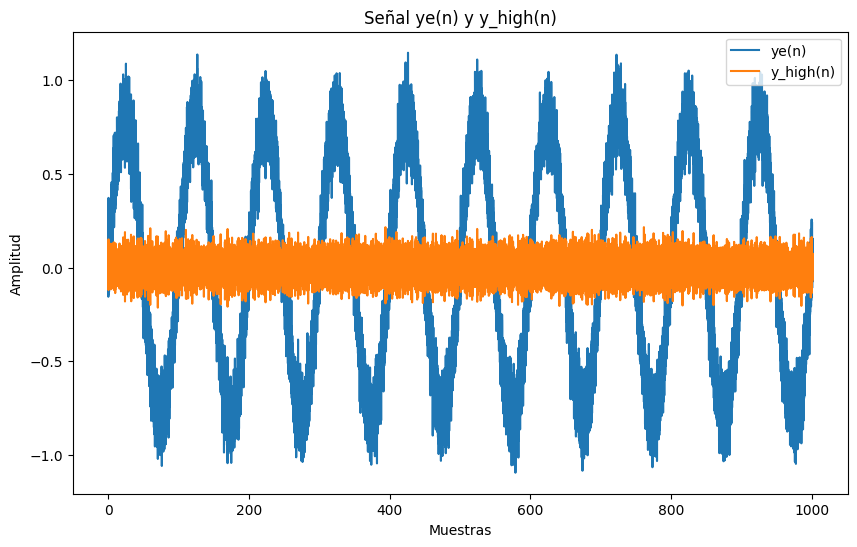

In [22]:
# Gráfica de la señal filtrada vs la señal sin filtrar
plt.figure(figsize=(10, 6))
plt.plot(n, ye, label='ye(n)')
plt.plot(n, y_high, label='y_high(n)')
plt.title('Señal ye(n) y y_high(n)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

_Filtro pasa banda_

Un filtro pasa banda permite el paso de frecuencias dentro de un rango específico mientras atenúa las frecuencias fuera de ese rango. Para diseñar un filtro pasa banda con una frecuencia de corte adicional de 7.5 muestras/s, necesitamos definir dos frecuencias de corte: una frecuencia de corte inferior (frecuencia de corte baja) y una frecuencia de corte superior (frecuencia de corte alta). La diferencia entre estas dos frecuencias determinará el ancho de banda del filtro.

In [23]:
# Parámetros del filtro FIR pasa banda
fc_low = 1.25 # Frecuencia de corte baja en muestras
fc_high = 7.5  # Frecuencia de corte alta en muestras
order = 30  # Orden del filtro
nyquist= Fs/2
wn_b = [fc_low/nyquist, fc_high/nyquist]  ## Frecuencias de corte normalizadas


In [24]:
# Diseño del filtro FIR pasa banda
bandpass = signal.firwin(order + 1, wn_b, pass_zero='bandpass', window='hamming')
y_band = signal.filtfilt(b=bandpass, a=1, x=ye)  # Aplico el filtro pasa banda

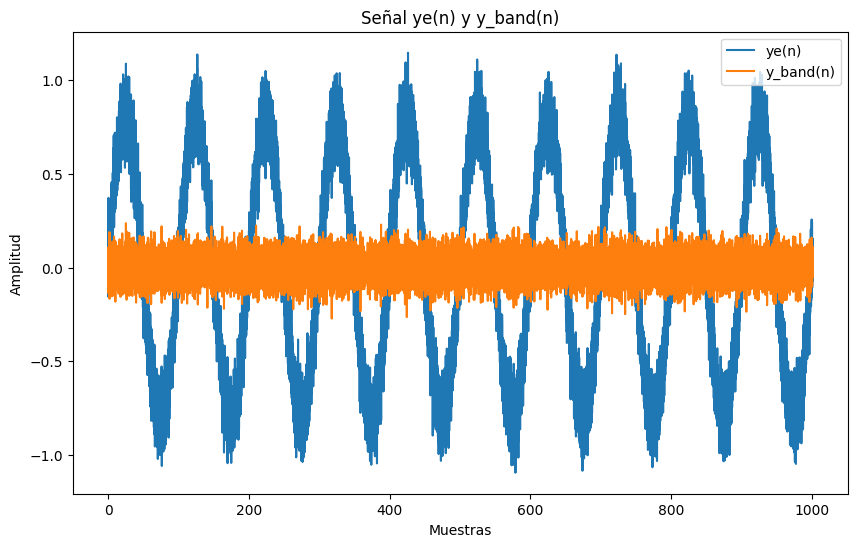

In [25]:
# Gráfica de la señal filtrada vs la señal sin filtrar
plt.figure(figsize=(10, 6))
plt.plot(n, ye, label='ye(n)')
plt.plot(n, y_band, label='y_band(n)')
plt.title('Señal ye(n) y y_band(n)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

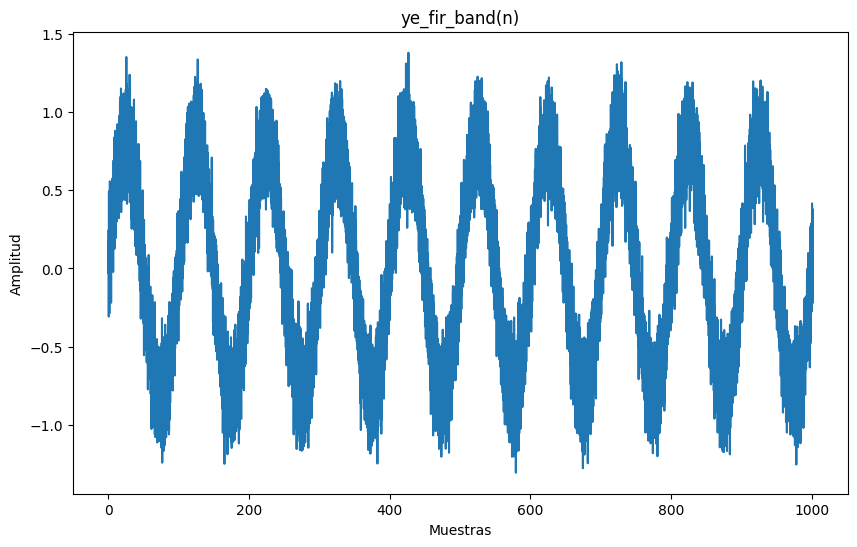

In [26]:

# Diseño del filtro FIR pasa altas para frecuencia inferior
b_fir_band_low = signal.firwin(order + 1, fc_low / nyquist, pass_zero=False)

# Diseño del filtro FIR pasa bajas para frecuencia superior
b_fir_band_high = signal.firwin(order + 1, fc_high / nyquist)

# Respuesta del filtro pasa banda combinando las respuestas de los filtros pasa altas y pasa bajas
b_fir_band = b_fir_band_high + b_fir_band_low

# Filtrado de la señal ye(n)
ye_fir_band = signal.lfilter(b_fir_band, 1, ye)

# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(n, ye_fir_band)
plt.title('ye_fir_band(n)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()



· Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.

_Filtro IIR pasa bajas_

In [27]:
# Frecuencia de corte normalizada
wn_low = 1.25 / nyquist # Frecuencia de corte normalizada
order = 20

In [28]:
# Diseño del filtro IIR pasa bajas
num,den= signal.iirfilter(order, wn_low, btype='lowpass', ftype='butter')
y_low = signal.filtfilt(b=num,a=den, x=ye)  # Aplicar filtro pasa bajas

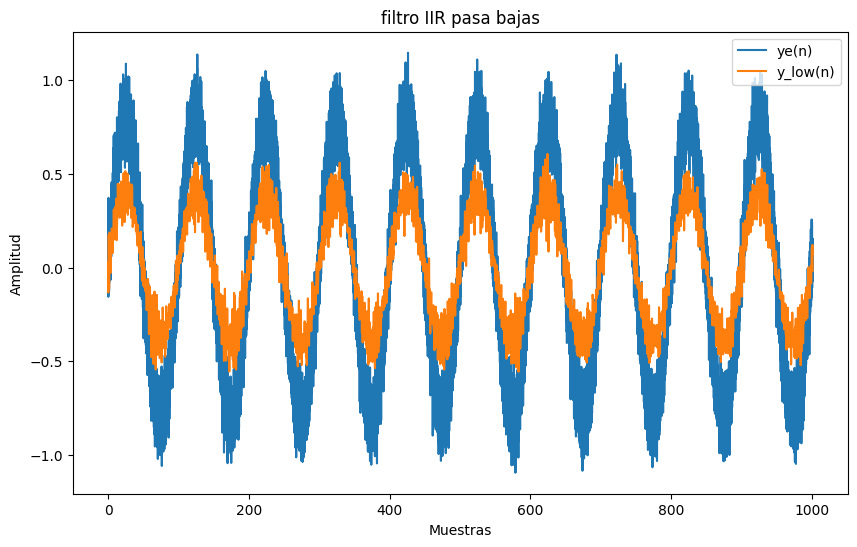

In [31]:
# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(n, ye, label='ye(n)')
plt.plot(n, y_low,label='y_low(n)')
plt.title('filtro IIR pasa bajas')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()



_Filtro IIR Pasa Altas:_

In [32]:
# Frecuencia de corte normalizada
wn_high = 7.5 / nyquist  # Frecuencia de corte normalizada

In [33]:
# Diseño del filtro IIR pasa altas
order = 20
numerador, denominador = signal.iirfilter(order+1, wn_high, btype='highpass', ftype='butter')
y_high = signal.filtfilt(b=numerador,a=denominador, x=ye)  # Aplicar filtro pasa altas

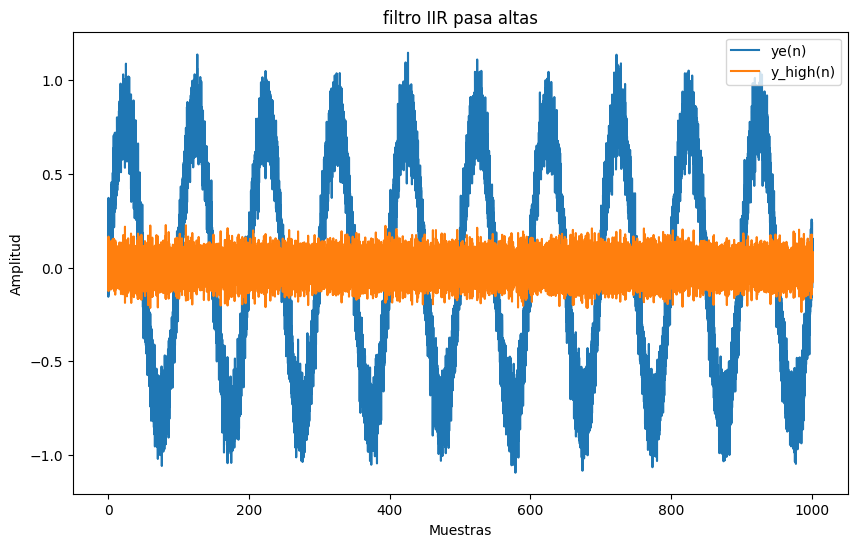

In [63]:
# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
plt.plot(n, ye, label='ye(n)')
plt.plot(n,y_high,label='y_high(n)')
plt.title('filtro IIR pasa altas')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

_Filtro IIR Pasa Banda_

In [40]:
# Frecuencias de corte normalizadas
fc_low = 1.25 / (Fs / 2)  # Frecuencia de corte inferior normalizada
fc_high = 7.5 / (Fs / 2)  # Frecuencia de corte superior normalizada

order = 15

# Diseño del filtro IIR pasa banda

nume, deno = signal.iirfilter(order+1, [fc_low, fc_high], btype='bandpass', analog=False, ftype='butter')
y_pass = signal.filtfilt(b=nume,a=deno, x=ye)  # Aplicar filtro pasa altas

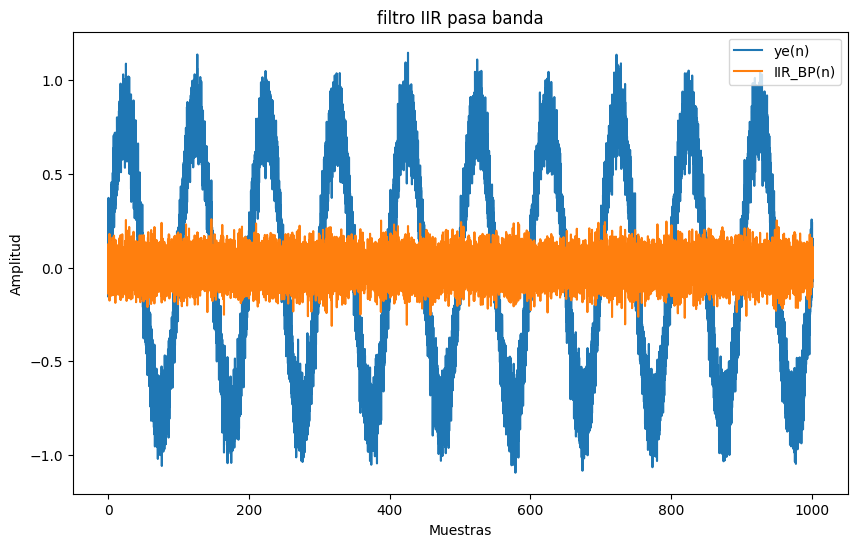

In [44]:
# Gráfica de la señal filtrada
plt.figure(figsize=(10, 6))
#plt.plot(n, ye, label='ye(n)')
plt.plot(n,y_pass,label='IIR_BP(n)')
plt.title('filtro IIR pasa banda')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

**4.3 Comparación entre los filtros**

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado?

In [25]:
# Filtro FIR pasa bajas
lowpass_fir = signal.firwin(order+1, wn, pass_zero='lowpass', window='hamming')

# Filtrado con lfilter
y_fir_lfilter =signal.lfilter(b=lowpass_fir, a=1, x=ye)

# Filtrado con filtfilt
y_fir_filtfilt = signal.filtfilt(b=lowpass_fir, a=1, x=ye)

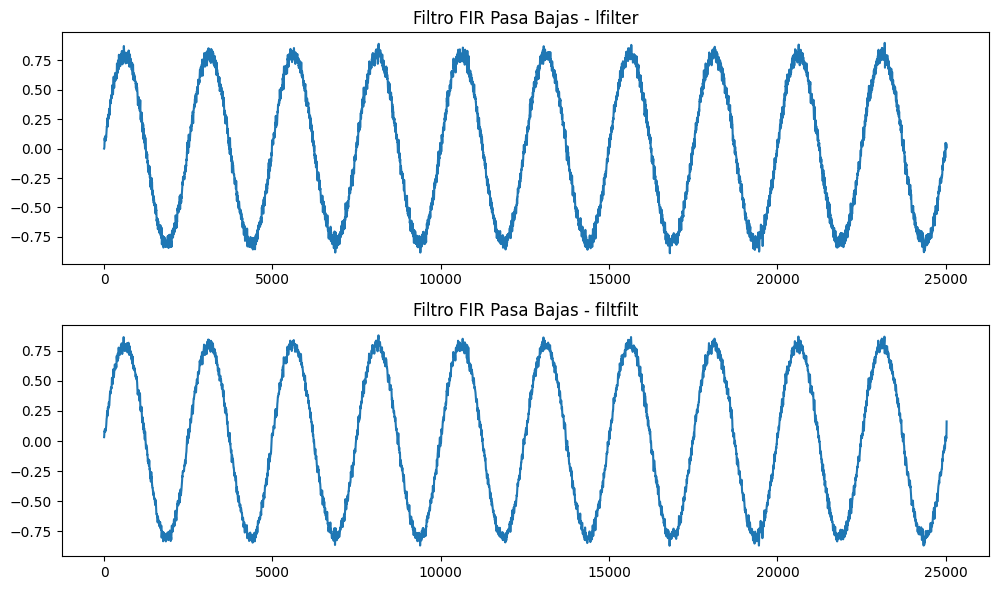

In [26]:
# Visualización
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y_fir_lfilter)
plt.title('Filtro FIR Pasa Bajas - lfilter')

plt.subplot(2, 1, 2)
plt.plot(y_fir_filtfilt)
plt.title('Filtro FIR Pasa Bajas - filtfilt')


plt.tight_layout()
plt.show()

Respuesta:

En el caso de un filtro FIR, se utiliza solo el numerador (coeficientes b) porque el denominador es 1 (no hay realimentación). El numerador contiene los coeficientes del filtro FIR, que definen la respuesta al impulso finita del filtro.

Aquí, a=1 indica que el denominador es 1 (no hay componente IIR).

En cuanto a la falta de coincidencia, lfilter es causal, lo que significa que utiliza solo la información pasada y presente, mientras que filtfilt es no causal y utiliza la información pasada y futura. Esta diferencia puede llevar a discrepancias en los resultados, especialmente en los bordes de la señal.

Ahora bien,  el orden del filtro, tiene un gran impacto en cómo filtra una señal. Un filtro con un orden más alto puede ser más selectivo, es decir, puede separar mejor las partes de la señal que deseamos de las que no deseamos. Sin embargo, este aumento en la selectividad a menudo viene con un costo: puede distorsionar más la señal, especialmente en los bordes donde se produce la transición entre las partes que deja pasar y las que atenúa. Por lo tanto, elegir el orden del filtro adecuado es crucial y depende de las necesidades específicas de la aplicación y las características de la señal que se está filtrando.

- Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

In [27]:
# Filtro IIR pasa bajas

order = 20 
wn_low = 1.25 / nyquist # Frecuencia de corte normalizada

num,den= signal.iirfilter(order, wn_low, btype='lowpass', ftype='butter')

# Filtrado con lfilter
y_iir_lfilter = signal.lfilter(b=num, a=den, x=ye)

# Filtrado con filtfilt
y_iir_filtfilt = signal.filtfilt(b=num, a=den, x=ye)

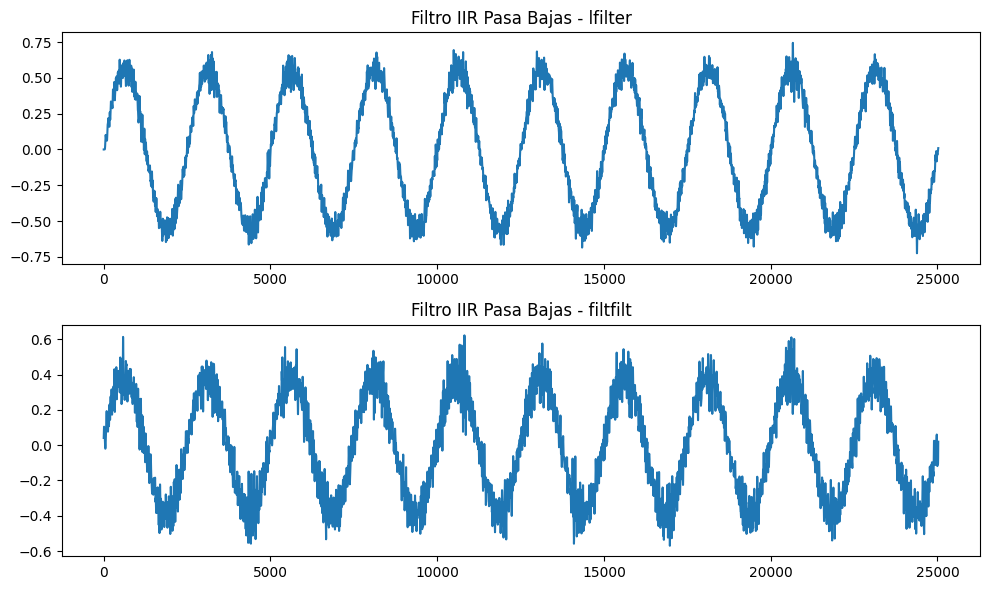

In [28]:
# Visualización
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(y_iir_lfilter)
plt.title('Filtro IIR Pasa Bajas - lfilter')

plt.subplot(2, 1, 2)
plt.plot(y_iir_filtfilt)
plt.title('Filtro IIR Pasa Bajas - filtfilt')


plt.tight_layout()
plt.show()

En el caso de un filtro IIR, se utilizan tanto el numerador (b) como el denominador (a).El numerador contiene los coeficientes de retroalimentación del filtro, mientras que el denominador contiene los coeficientes de avance. Estos coeficientes son necesarios para tener en cuenta la componente recursiva del filtro.

En cuanto a la falta de coincidencia, lfilter es causal, lo que significa que utiliza solo la información pasada y presente, mientras que filtfilt es no causal y utiliza la información pasada y futura. Esta diferencia puede llevar a discrepancias en los resultados, especialmente en los bordes de la señal.

El orden del filtro afecta la respuesta del filtro en términos de atenuación y anchura de banda de transición. En general, un mayor orden proporciona una mejor selectividad pero puede introducir más distorsión en la señal. Es importante seleccionar el orden del filtro de manera adecuada según los requisitos de diseño específicos y las características de la señal.

En general, los filtros FIR son más fáciles de diseñar y garantizan la estabilidad, pero requieren un orden más alto para obtener una respuesta en frecuencia aguda. Los filtros IIR pueden lograr una respuesta en frecuencia aguda con un orden más bajo, pero pueden presentar problemas de estabilidad si no se diseñan correctamente.

En función de esto, se cambia el orden que se tenía inicialmnete, dado que cuando se hacía con un orden de 3 no se obtenian buenos resultados el el filtro de la señal 

**4.4 Aplicación**

In [46]:
# Cargar la señal
#signal = np.loadtxt(r'C:\Users\famil\OneDrive\Escritorio\Bioseñales\P6\senal_filtros.txt')
signal =np.loadtxt('senal_filtros.txt')
fs = 500  # Frecuencia de muestreo en Hz
canal1 = signal[:, 0]

# Extraer el canal 1
#canal1 = signal[:, 0]

In [47]:
# Reviso que si haya cargado bien los datos
canal1 

array([-7.0306, -7.0157, -7.0426, ..., -7.5644, -7.5477, -7.5434])

-  Análisis frecuencial con el periodograma de Welch:

In [48]:
# Parámetros para el análisis de Welch
fs = 500
window = 'hann'  # Ventana utilizada
nperseg = 2000  # Longitud de los segmentos
noverlap = nperseg // 2 # Solapamiento del 50%

In [49]:
import scipy.signal
# Calcular el periodograma de Welch
f, psd_original = scipy.signal.welch(canal1, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)


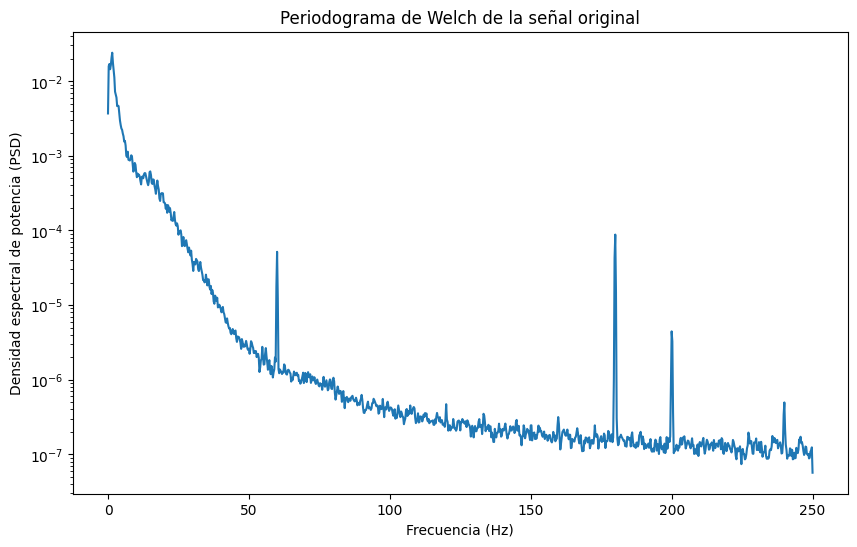

In [50]:
# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(f, psd_original)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.title('Periodograma de Welch de la señal original')
plt.show()

Basado en el periodograma de Welch de la señal original que se ha obtenido,  se observa

- El pico prominente alrededor de los 100 Hz y sus armónicos (200 Hz, etc.) indica la presencia de ruido eléctrico en la señal, probablemente debido a la interferencia de la red eléctrica de 60 Hz y sus componentes armónicos.
-  La mayor densidad espectral de potencia se concentra en las bajas frecuencias, lo que sugiere que la señal contiene información relevante en ese rango.

In [56]:
# Diseñar un filtro FIR paso bajo
#Aquí, estoy diseñando un filtro FIR paso bajo con una frecuencia de corte de 50 Hz 
#y un orden de 100. Esto permitirá eliminar el ruido eléctrico observado en el periodograma,
# manteniendo las componentes de baja frecuencia de la señal.
freq_corte = 50 # Frecuencia de corte en Hz
orden = 200# Orden del filtro
wn1= freq_corte/(fs/2) # Frecuencia de corte normalizada
coeffs = scipy.signal.firwin(orden+1, wn1, pass_zero='lowpass', window='hamm')
# Filtrar la señal
señal_filtrada = scipy.signal.filtfilt(coeffs, 1, canal1)

_Verificar el periodograma de la señal filtrada:_

In [57]:
f, psd_filtrada = scipy.signal.welch(señal_filtrada, fs=fs, window=window, nperseg=nperseg, noverlap=noverlap)

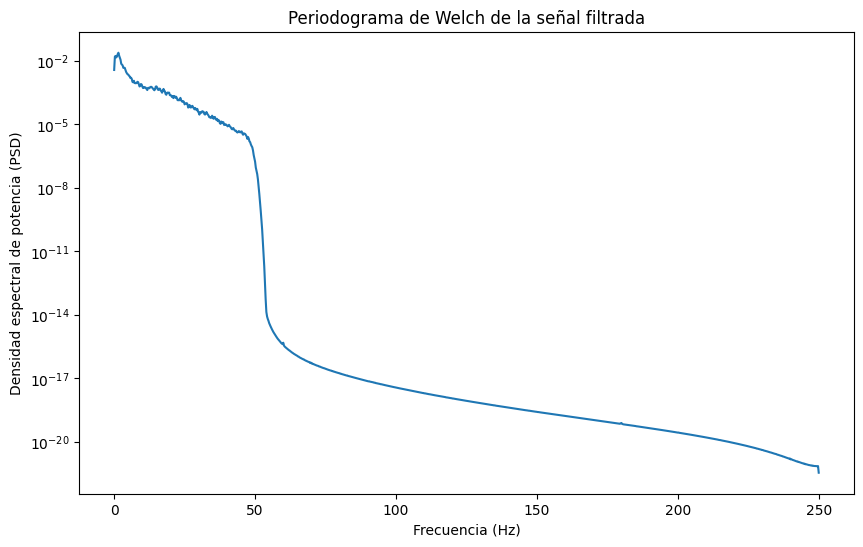

In [58]:
# Graficar el periodograma de Welch
plt.figure(figsize=(10, 6))
plt.semilogy(f, psd_filtrada)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (PSD)')
plt.title('Periodograma de Welch de la señal filtrada')
plt.show()

Observaciones :
- El pico prominente en los 100 Hz y sus armónicos ha sido eliminado, lo que indica que el ruido eléctrico ha sido efectivamente suprimido por el filtro FIR paso bajo aplicado.

- La densidad espectral de potencia se concentra ahora en las frecuencias más bajas, por debajo de los 50 Hz (frecuencia de corte del filtro).

- La amplitud de la densidad espectral de potencia ha disminuido considerablemente en comparación con la señal original, lo que sugiere que gran parte de la energía de la señal se encontraba en las frecuencias más altas que fueron atenuadas por el filtro.

_Graficar un segmento de las señales antes y después del filtrado:_

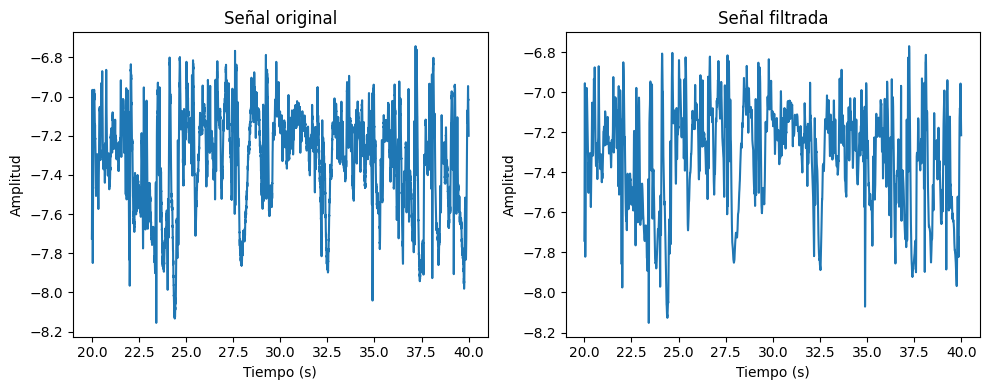

In [59]:
# Graficar un segmento de las señales
inicio = 10000  # Índice de inicio del segmento
fin = 20000     # Índice de fin del segmento
tiempo = np.arange(inicio, fin) / fs

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(tiempo, canal1[inicio:fin])
plt.title('Señal original')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(1, 2, 2)
plt.plot(tiempo, señal_filtrada[inicio:fin])
plt.title('Señal filtrada')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

**Observaciones:**

- La señal original muestra un aspecto más "ruidoso" o "irregular", con pequeñas oscilaciones rápidas superpuestas a las fluctuaciones principales. Este ruido de alta frecuencia ha sido eliminado en gran medida en la señal filtrada, lo que resulta en una forma de onda más suave y "limpia".

- las variaciones de baja frecuencia (oscilaciones más lentas y de mayor período) siguen siendo visibles en la señal filtrada. Esto es debido a que el filtro FIR paso bajo aplicado está diseñado para conservar las componentes de baja frecuencia mientras atenúa las componentes de alta frecuencia.

- Como resultado del filtrado, la forma de onda de la señal filtrada se ve más "suavizada" en comparación con la señal original. Los cambios abruptos y las transiciones bruscas han sido suavizados, lo que puede ser beneficioso para ciertos análisis o aplicaciones posteriores.